### Imports


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import math
import os


In [14]:
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

df = pd.read_csv(r"CSE575-HW03-Data.csv", header=None)
x = np.array(df)
df.isna

<bound method DataFrame.isna of           0       1        2       3       4       5       6       7       8    
0    92.9894 -9.6430  -4.6412 -6.8569 -5.2263 -4.9604  2.3191 -0.4579  0.5685  \
1    73.4054  6.5269  -6.6736  0.5054 -4.4818 -5.1157 -6.3784  1.6296 -3.3999   
2    94.6334 -4.5986 -12.4970 -6.3137 -6.7072 -7.4690 -6.7463 -3.6960 -3.4587   
3    89.1135 -2.2287   0.2304 -2.7300 -0.9133 -1.9530 -1.0086  0.1486  2.0624   
4    76.1929  2.5222   9.1796  4.3947  6.6885  4.0074  1.9488  2.2791 -0.2567   
..       ...     ...      ...     ...     ...     ...     ...     ...     ...   
123  86.5598 -4.0067   0.7036  1.3357 -6.9007  0.8063 -0.4726 -0.2890 -1.3798   
124  83.8025 -3.4814   3.5016 -0.2959 -7.0385  2.3506 -3.7101  3.5613 -1.5063   
125  79.5542 -3.4625  -1.1868  2.6972 -6.5663  2.2622 -2.6907  3.2315 -3.5141   
126  84.3496 -2.7338  -1.3004  2.2604 -6.9315  0.1138 -3.1434  1.6895 -3.1004   
127  76.0285 -1.3821   5.1412  1.8667  0.0313 -0.0508  1.6752 -0.8004 -0.2574

## K-Means Clustering

In [15]:
class KMeansClustering:
    def __init__(self, no_of_clusters=5) -> None:
        self.no_of_clusters = no_of_clusters
        self.centroids = None

    def fit_transform(self, X, no_of_iterations=20):
        size = X.shape[0]
        x_max = X.max(dim=0)[0].unsqueeze(1)
        x_min = X.min(dim=0)[0].unsqueeze(1)

        dists = torch.zeros((size, self.no_of_clusters))
        best_loss = 1e5
        pred = None

        for _ in range(no_of_iterations):
            centroids = (x_min - x_max) * torch.rand((X.shape[1], self.no_of_clusters)) + x_max
            old_loss = -1
            while 1:
                for i in range(self.no_of_clusters):
                    ctr = centroids[:, i].unsqueeze(1)
                    dists[:, i] = (X - ctr.T).pow(2).sum(dim=1).sqrt()
                dists_min, labels = dists.min(dim=1)

                for i in range(self.no_of_clusters):
                    idx = torch.where(labels == i)[0]
                    if len(idx) == 0:
                        continue
                    
                    centroids[:, i] = X[idx].mean(dim=0)
                
                new_loss = dists_min.sum()
                if old_loss == new_loss:
                    break
                old_loss = new_loss

            if new_loss < best_loss:
                best_loss = new_loss
                pred = labels
            
            return pred, dists_min

### Plot

In [16]:
X = torch.from_numpy(x).float()

objectiveCostValues1 =[]
objectiveCostValues2 =[]
objectiveCostValues3 =[]

kValues =[]

def k_means(k):
    kms = KMeansClustering(no_of_clusters=k)
    pred, dists_min = kms.fit_transform(X)

    objectiveCostValues1.append(torch.sum(dists_min))
    objectiveCostValues2.append(torch.sum(dists_min **2))
    objectiveCostValues3.append(math.sqrt(torch.sum(dists_min **2)))
    kValues.append(k)

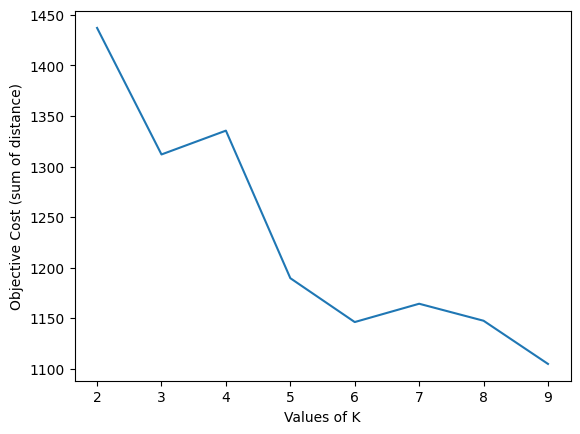

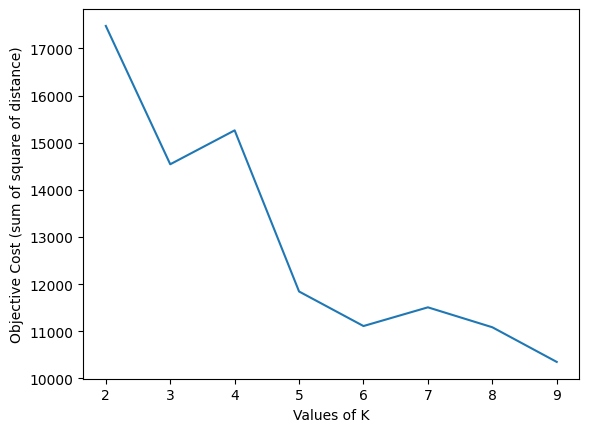

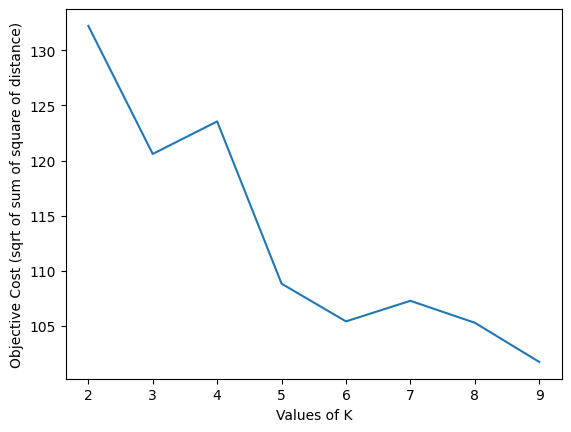

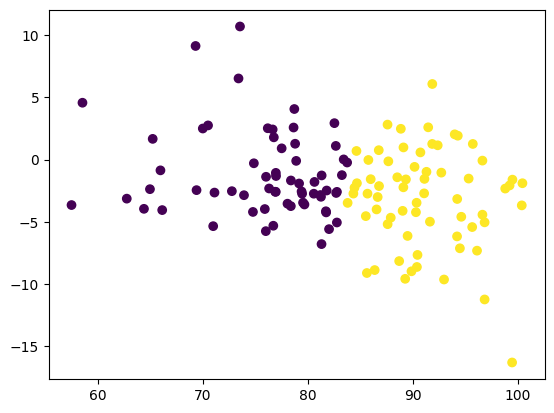

In [17]:
for k in [2,3,4,5,6,7,8,9] :
    k_means(k)
plt.figure('1')    
plt.plot(kValues, objectiveCostValues1)
plt.xlabel("Values of K")
plt.ylabel("Objective Cost (sum of distance)")
plt.figure('2')
plt.plot(kValues, objectiveCostValues2)
plt.xlabel("Values of K")
plt.ylabel("Objective Cost (sum of square of distance)")    
plt.figure('3')
plt.plot(kValues, objectiveCostValues3)
plt.xlabel("Values of K")
plt.ylabel("Objective Cost (sqrt of sum of square of distance)")    
plt.figure('0')


x_2 = df.iloc[0:, 0:2]
X = torch.from_numpy(np.array(x_2)).float()

kms = KMeansClustering(no_of_clusters=2)
pred, dists_min = kms.fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], c=pred)